## 의사결정나무 (Decision Tree)

       (1) 장점
            - 만들어진 모델을 쉽게 시각화하여 이해하기 쉽다
            - 데이터의 스케일(scale)에 영향을 받지 않아서 특성(feature)의 정규화나 표준화 같은 전처리 과정이 필요없다

       (2) 단점
            - 사전 가지치기를 사용함에도 과대적합되는 경향이 있어서 일반화 성능이 좋지 않다



<img src='./imgs/DT.png'>


[예제 ] 붓꽃(Iris) 품종 

- 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 측정하여 품종을 예측한다
- 150개의 데이타에서 3가지 품종(setosa, versicolor, virginica)로 분류한다

In [3]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


ModuleNotFoundError: No module named 'sklearn'

In [10]:
# 1. 데이타 로딩

iris = datasets.load_iris()

# 데이터 key 확인
# print(iris.keys())


In [72]:
# 2. 데이터와 레이블 분리 변수 선언

X = iris.data
y = iris.target

# 3. 데이타셋을 분리 ( 학습용:검증용 = 7:3 )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [73]:
# 5. 트리 모델 생성하고 학습하기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

model

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [74]:
# 6. 정확도
import numpy as np
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('훈련점수: ', model.score(X_train, y_train))
print('테스트점수: ', model.score(X_test, y_test))

print('정확도:', np.mean(y_test == y_predict))

newdata = np.array([[6.5 ,3.  ,5.5 ,1.8]])
result = model.predict(newdata)
print(iris['target_names'][result])


훈련점수:  0.9642857142857143
테스트점수:  0.8947368421052632
정확도: 0.8947368421052632
['virginica']





---

# 결정트리 시각화

[ 참고 ] graphviz 설치

    - Graphviz 프로그램 연결하는 라이브러리(??)
        > pip install graphviz
        

    - 직접설치 필요
      :  https://graphviz.gitlab.io/_pages/Download/Download_windows.html
      
      (1) 다운받아 직접 설치
           
           > Windows > Stable 2.38 Windows install packages > 10 > release >  graphviz-2.38.msi 다운로드 받아 실행

      (2) chocolatey를 이용하여 설치
      
          [참고] window10에 초코라때 설치
                1- 먼저 Windows PowerShell (관리자)를 실행합니다.
                2- 한줄로 명령 입력 
> Set-ExecutionPolicy Bypass -Scope Process -Force; iex ((New-Object System.Net.WebClient).DownloadString('https://chocolatey.org/install.ps1'))  

                3- 설치 확인
                    > choco -v
                
                4- choco를 이용하여 설치
                    > choco install graphviz
                    
                5- graphviz 설치 확인
                    C:\Program Files\Graphviz
                    

- 환경변수 지정 (소스에서 ) : C:/Program Files/Graphviz/bin/



        import os

        os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


In [1]:
# !pip install graphviz

In [2]:
# pydotplus 설치
# ! pip install pydotplus

In [54]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

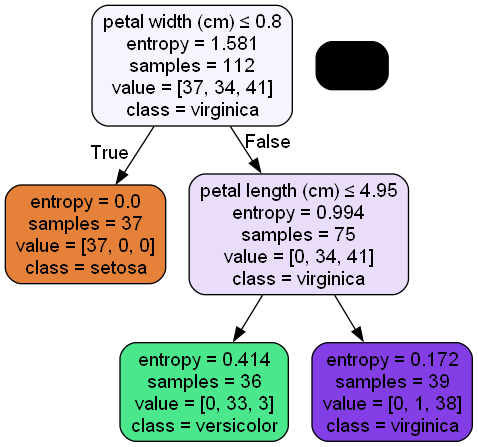

In [75]:
# graphviz의 경로를 환경변수 PATH에 등록
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data = export_graphviz(model, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

        #dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
        #                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


# 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 이미지로 변환
Image(graph.create_png())